<a href="https://www.kaggle.com/code/wwebster/concrete-data-regression-using-randomizedsearchcv?scriptVersionId=122679191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Imports and initial data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv')

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
df.duplicated().sum()

25

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


## Visualizations

#### Correlation

<AxesSubplot:>

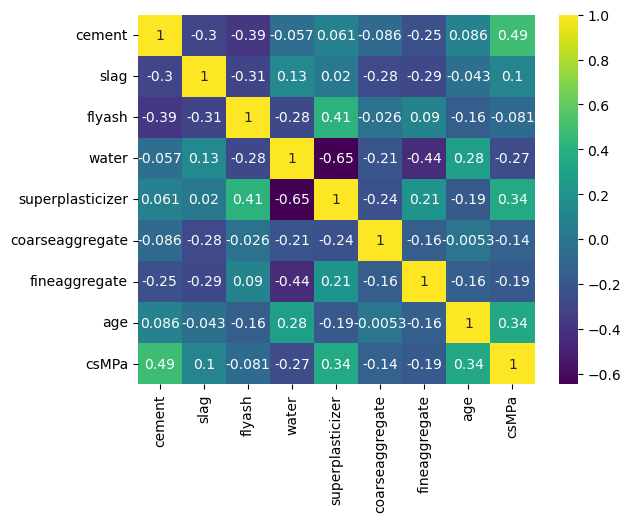

In [9]:
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

#### Another way of showing the correlations to csMPa (our target value)

<AxesSubplot:>

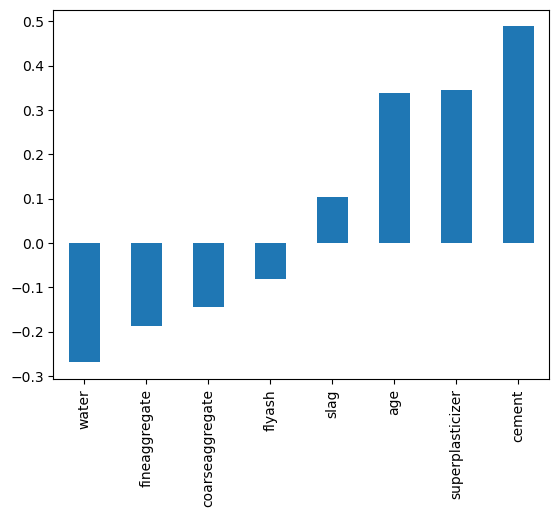

In [10]:
df.corr()['csMPa'][:-1].sort_values().plot(kind='bar')

#### Data distributions

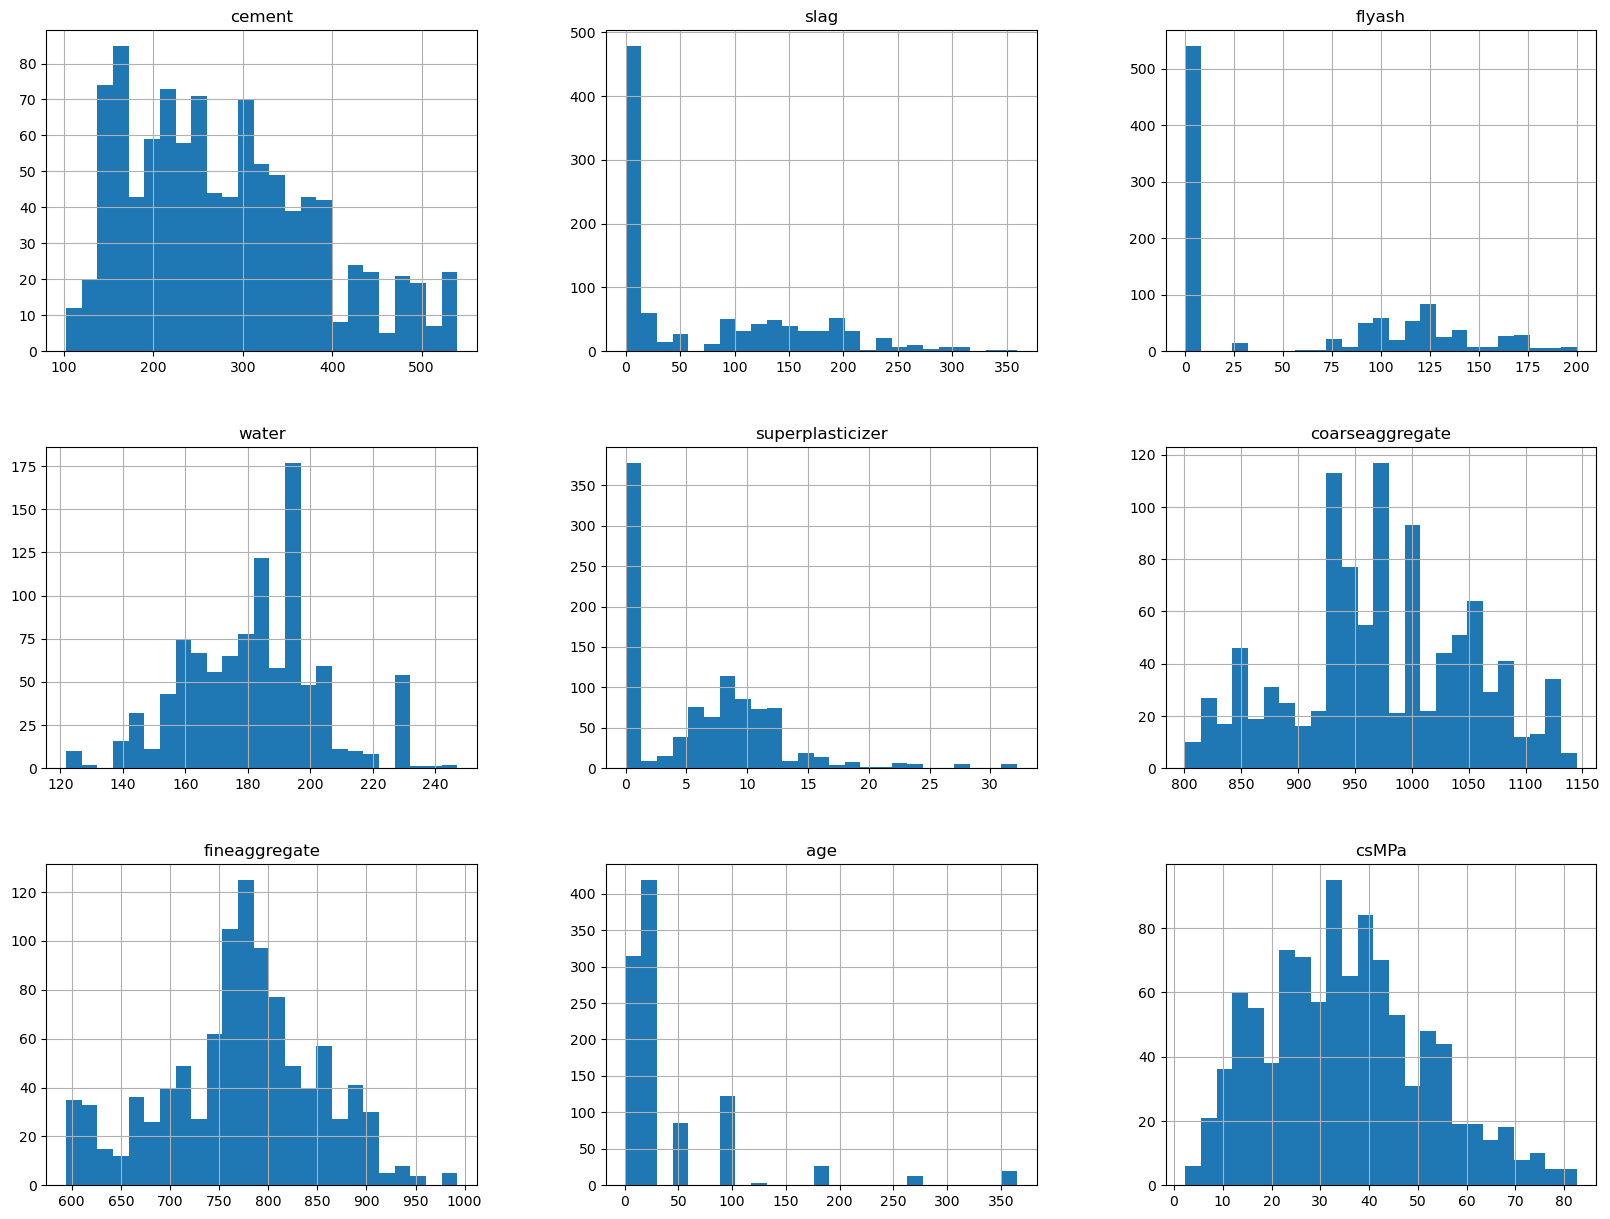

In [11]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

## Train test split 

In [12]:
X = df.drop('csMPa', axis=1)
y = df['csMPa']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

#### Fit the scaler only to the training data

In [16]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Test various ML algorithms to narrow down a couple promising ones

In [17]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [18]:
random_forest = RandomForestRegressor(random_state=101)
adaboost = AdaBoostRegressor(random_state=101)
gradient_boosting = GradientBoostingRegressor(random_state=101)
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=101)
svr = SVR()

#### Using cross_validate instead of cross_val_score so we can use more than one performance metric (mean squared error and mean absolute error)

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
estimators = [random_forest, adaboost, gradient_boosting, linear_regression, decision_tree, svr]

mae = []
rmse = []
for estimator in estimators:
    scores = cross_validate(estimator, scaled_X_train, y_train,
                            scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                            cv=10)
    
    scores = pd.DataFrame(scores)
    mae.append(abs(scores.mean()['test_neg_mean_absolute_error']))  
    rmse.append(np.sqrt(abs(scores.mean()['test_neg_mean_squared_error'])))

In [21]:
estimator_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting',
                   'Linear Regression', 'Decision Tree', 'SVR']

In [22]:
results = {'Estimator': estimator_names, 'MAE': mae, 'RMSE': rmse}

#### Display results

In [23]:
pd.DataFrame(data=results).sort_values(by='RMSE')

,Estimator,MAE,RMSE
2,Gradient Boosting,3.875716,5.215854
0,Random Forest,3.729060,5.286113
4,Decision Tree,4.729417,7.121028
1,AdaBoost,6.256689,7.644868
5,SVR,7.759833,9.914855
3,Linear Regression,8.061542,10.173575


## Hyperparameter tuning using RandomizedSearchCV for the top two algorithms (Gradient Boosting and Random Forest) 

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
max_depth = [x for x in range(1, 51)]
max_depth.append(None)

gb_params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
             'learning_rate': np.arange(0.1, 2.1, 0.1),
             'n_estimators': np.arange(100, 250, 5),
             'criterion': ['friedman_mse', 'squared_error'],
             'min_samples_split': np.arange(2, 11, 1),
             'min_samples_leaf': np.arange(1, 11, 1),
             'max_depth': max_depth,
             'max_features': ['auto', 'sqrt', 'log2']}

Note: Reduce the number of iterations (n_iter) of RandomizedSearchCV to reduce training train.

In [26]:
gb_randsearch = RandomizedSearchCV(estimator=gradient_boosting,
                                   param_distributions=gb_params,
                                   n_iter=50,
                                   scoring='neg_mean_squared_error',
                                   cv=5, random_state=101)

In [27]:
gb_randsearch.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=101),
                   n_iter=50,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      1...
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
        

In [28]:
gb_randsearch.best_estimator_

GradientBoostingRegressor(max_depth=39, max_features='sqrt', min_samples_leaf=6,
                          min_samples_split=3, n_estimators=175,
                          random_state=101)

#### Random Forest

In [29]:
rf_params = {'n_estimators': np.arange(100, 250, 5),
             'min_samples_split': np.arange(2, 11, 1),
             'min_samples_leaf': np.arange(1, 11, 1),
             'max_depth': max_depth,
             'max_features': ['auto', 'sqrt', 'log2']}

In [30]:
rf_randsearch = RandomizedSearchCV(estimator=random_forest,
                                   param_distributions=rf_params,
                                   n_iter=50,
                                   scoring='neg_mean_squared_error',
                                   cv=5, random_state=101)

In [31]:
rf_randsearch.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180

In [32]:
rf_randsearch.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_split=4, n_estimators=120,
                      random_state=101)

## Compare new results on test set (no tuning after this step as the test set is our unseen data)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
y_pred_gb = gb_randsearch.predict(scaled_X_test)
print('Gradient Boosting')
print(f'MAE: {mean_absolute_error(y_test, y_pred_gb):0.2f}')  
print(f'RMSE: {mean_squared_error(y_test, y_pred_gb, squared=False):0.2f}')

y_pred_rf = rf_randsearch.predict(scaled_X_test)
print('\nRandom Forest')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf):0.2f}')  
print(f'RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):0.2f}')

Gradient Boosting
MAE: 2.57
RMSE: 4.41

Random Forest
MAE: 3.61
RMSE: 5.23


### Gradient Boosting performed better after hyperparameter tuning, however, Random Forest performed approximately the same. 

### Suggestions for improvement:
#### 1. Could try testing out a few additional algorithms as part of the baseline testing
#### 2. Only one round of hyperparameter tuning was performed, could continue this process (possibly employ a gridsearch instead)
#### 3. If this model was deployed, would first need to train on the entire data set (including the test set) and setup a pipeline to handle missing values and scaling of new data 